In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = HistGradientBoostingClassifier(max_iter=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy Hist Gradient Boosting Classifier: ", accuracy_score(y_test, y_pred))

Accuracy Hist Gradient Boosting Classifier:  0.9994725181981222


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00     10002
      banana       1.00      1.00      1.00     11814
        wine       1.00      1.00      1.00     16100

    accuracy                           1.00     37916
   macro avg       1.00      1.00      1.00     37916
weighted avg       1.00      1.00      1.00     37916



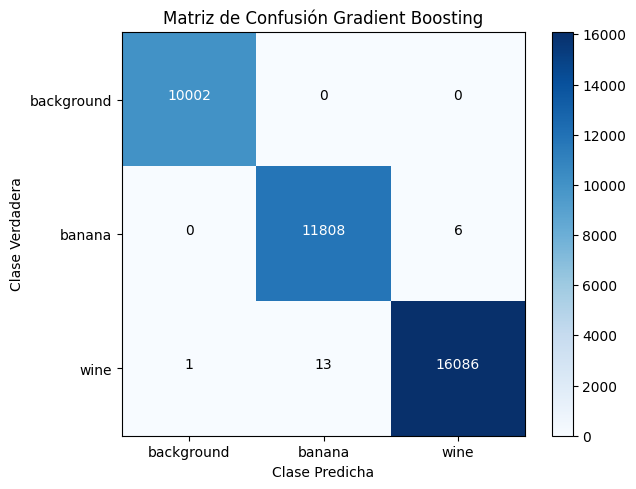

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


# Visualizar la matriz de confusión
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Gradient Boosting')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_pred))
for i in range(3):
    for j in range(3):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()
